# Predicting Object Location

In this thesis we look at different Model based machine learning techniques that will help in answering the bellow questions.

1. Where can I find a particular object in a specific home ? (General Question)

2. Where can I find a particular object in a specific home at a particular time ? (Specific)

## Suplementary Questions :

1. How much data do I need to find both the above answers?
2. Sparse dataset : How do we infer in time slots where we have no observations?

## Extended Question:

1. Absence of object(Not seeing) is also beleiving.

# Evaluation

For evaluation of the proposed models in the thesis we will use the ARUBA Dataset made available by the STRANDS project.
Aruba dataset of person presence collected at a smart apartment by the Center for Advanced Studies in Adaptive Systems, [CASAS](http://eecs.wsu.edu/~cook/pubs/is10.pdf)
The dataset is about the presence of a single person at different locations of the home. 

# ARUBA Dataset

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.names'

location_names = {}
count = 0
with open(aruba_dataset_path, 'r') as content_file:
    content = content_file.read()
    content = str.splitlines(content)
for count,location in enumerate(content):
    location_names[count] = location
    
aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.min'

dataset = pd.read_csv(aruba_dataset_path, names=['location', 'time'])
dataset['time'] = dataset.index
dataset['time'] = pd.to_timedelta(dataset['time'], unit='m')
dataset['day'] = (dataset['time']/ np.timedelta64(1, 'D')).astype(int)
dataset['hour'] = (dataset['time']/ np.timedelta64(1, 'h')).astype(int)

def mod_for_hour(row):
    return row['hour'] % 24

dataset['sep_hour'] = dataset.apply(mod_for_hour, axis=1)

#Renaming location number with their names
for key,value in location_names.items():
    dataset.ix[dataset.location ==key, 'location_name'] = value
    
dataset.set_index(np.arange(dataset.shape[0]), inplace=True)



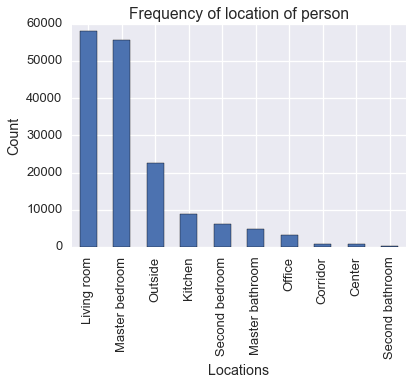

In [9]:
%matplotlib inline
ax = (dataset['location_name'].value_counts()).plot(kind='bar')
ax.set_title("Frequency of location of person")
ax.set_xlabel("Locations")
ax.set_ylabel("Count")

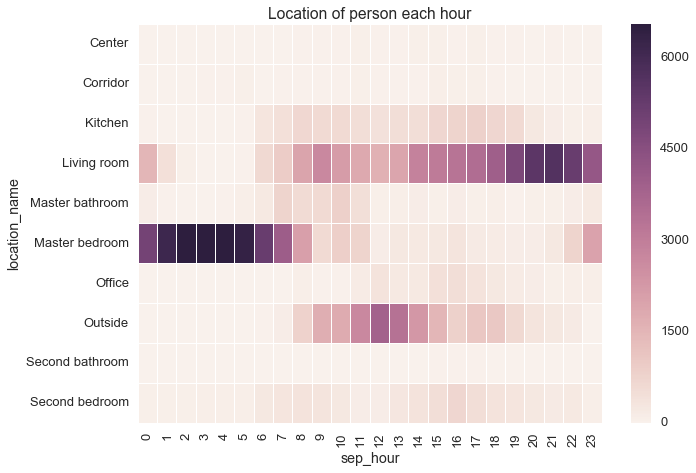

In [7]:
hour_vs_location = pd.crosstab(dataset['location_name'], 
                               dataset['sep_hour'])

sns.set_context('talk')
sns.set_style('darkgrid')
sns.heatmap(hour_vs_location, linewidths=.01)
plt.xticks(rotation=90)
plt.title("Location of person each hour")
plt.show()

# Reasons for choosing ARUBA Dataset

Aruba dataset records the human location in a home. This is analogus to object location in a home. Since object locations in home are only influenced by the way humans interact with it, the study of patterns in human location in home will enable us in studying the object location. 

Aruba dataset is a large dataset as compared to an object location dataset we assume the robot will be able to generate. The Aruba dataset has recordings of every minute for 118 days, which is 161280 readings. On the contrary the assumed dataset which will be collected by the robot by autonoumously roaming in a home will be just 3-5 readings per day. 

So for simulating the sparsity in the object location dataset we will sparsify the ARUBA dataset by selecting only selecting 3-5 readings each day.

## ARUBA dataset sparsification

Different strategies will be used to sparsify the dataset based on our knowledge about how the autonomous robot will do data collection. Learnings will be made on these created dataset and comparison will be made. The different strategies are:

* Random selection
* Random selection particular time period (morning 6 to night 10) : Assumption in night light condition will not enable object detection
* Only on particular time period : Assuming that robot does particular daily activities and data collection happens in that time


These sparsified dataset will be used to do learn the patterns in the human location and make predictions.

## Evaluation Strategy

### Model Comparison
This section mentions the methods used to compare the different models propsoed in the thesis

#### Posterior predictive check
The posterior predictive check requires one to generate new data from the predicted model.What it means is that after learning from sparse dataset, the model will generate the samples. This sample set can be compared with the actual full dataset. Comparing the actual and the generated dataset we can make conclusions on the quality of the learning of the model

![smaller](images/posterior_check.png){#id .class width=600 height=400px}

#### Model Comparison : Bayes Factor
  This is more of an analytical method of bayesian learning. Bayes Factor is an analytical method which is used to compare two models with each other. This can be used to compare the different proposed model on the different sparse datasets.
![smaller](images/model_comparison.png){#id .class width=600 height=400px}



### Data comaprison
This section mentions all the methods used to compare the prediction of each proposed model

#### Test Train data
The predicted model location will be compared with the actual location.

#### Time based evaluation
The STRANDS project paper "Where's Waldo at time t? Using Spatio-Temporal Models for Mobile Robot Search" by T. Krajnik, M. Kulich, L. Mudrova, R. Ambrus and T. Duckett uses the same dataset and has a time based evaluation starategy.
Which records the time taken for a robot a find the person.